In [1]:
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv('./train.csv')
train_data.head(5)

,user_id,device_id,age,sex,browser,source,country,purchase_value,signup_time,purchase_time,class
0,6b5aecb444b26,7a543b4bf3647,33,0,Safari,Ads,United States,48,2018-05-27 12:02:29,2018-08-19 14:09:55,0
1,f00edc3db68f0,c35ab03e7ff0f,26,1,Chrome,Direct,European Union,50,2018-06-06 08:09:12,2018-09-09 01:26:43,0
2,6f144a20b2e41,31a274c4b1d58,28,0,Chrome,Direct,United States,31,2018-03-29 18:24:17,2018-06-13 04:56:21,0
3,21db12c470157,74e7d74dbd61d,50,0,FireFox,Ads,United States,31,2018-06-18 02:49:33,2018-06-29 23:31:45,0
4,af1753dfd703c,b5f31ea91ae62,27,1,IE,SEO,United States,16,2018-01-31 18:26:38,2018-02-13 16:36:51,0


In [3]:
test_data = pd.read_csv('./test.csv')
test_data.head(5)

,user_id,device_id,age,sex,browser,source,country,purchase_value,signup_time,purchase_time
0,8fdb79dfdab19,5b4f85edff32c,32,1,Safari,SEO,United States,32,2018-02-05 04:39:18,2018-03-16 07:59:53
1,ae01bb5893cf5,3019f1e63a34b,47,1,Chrome,Direct,United States,30,2018-03-30 02:46:05,2018-05-15 15:33:45
2,563df4fb75a3d,431b43e6f56c8,26,1,Chrome,SEO,Panama,49,2018-02-16 04:53:25,2018-05-08 08:25:02
3,b21070f161c56,edb32ffdd016e,33,0,Safari,SEO,Italy,31,2018-04-28 00:15:22,2018-08-19 12:47:15
4,ee9775da22b94,32bcf0c089ae3,35,0,Chrome,Direct,United States,15,2018-05-08 16:42:44,2018-05-20 12:30:28


In [4]:
train_id =  train_data['user_id']  #######    訓練集 id
train_class = train_data['class']  #######    訓練集 y
test_id = test_data['user_id']       #######   測試集 id

print(train_id[0:3],end = '\n')
print('----------------------------\n'*3)
print(test_id[0:3])


0    6b5aecb444b26
1    f00edc3db68f0
2    6f144a20b2e41
Name: user_id, dtype: object
----------------------------
----------------------------
----------------------------

0    8fdb79dfdab19
1    ae01bb5893cf5
2    563df4fb75a3d
Name: user_id, dtype: object


In [5]:
print(train_data.shape)
print(test_data.shape)

(108800, 11)
(27200, 10)


In [6]:
print(train_class.values)

[0 0 0 ... 0 0 0]


In [7]:
train_data.drop('user_id', axis = 1 , inplace = True)
train_data.drop('class', axis = 1, inplace = True)
test_data.drop('user_id', axis = 1 , inplace = True)
print(train_data.shape)
print(test_data.shape)

(108800, 9)
(27200, 9)


In [8]:
print(train_data.info(), '\n')
print('-----------------------------------\n')
print(test_data.info(), end = '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108800 entries, 0 to 108799
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   device_id       108800 non-null  object
 1   age             108800 non-null  int64 
 2   sex             108800 non-null  int64 
 3   browser         108800 non-null  object
 4   source          108800 non-null  object
 5   country         92957 non-null   object
 6   purchase_value  108800 non-null  int64 
 7   signup_time     108800 non-null  object
 8   purchase_time   108800 non-null  object
dtypes: int64(3), object(6)
memory usage: 7.5+ MB
None 

-----------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27200 entries, 0 to 27199
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   device_id       27200 non-null  object
 1   age             27200 non-null  int64 
 2   sex         

In [9]:
train_data['country'].fillna('Other', inplace = True)
test_data['country'].fillna('Other', inplace = True)

In [10]:
print(train_data.info(), '\n')
print('-----------------------------------\n')
print(test_data.info(), end = '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108800 entries, 0 to 108799
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   device_id       108800 non-null  object
 1   age             108800 non-null  int64 
 2   sex             108800 non-null  int64 
 3   browser         108800 non-null  object
 4   source          108800 non-null  object
 5   country         108800 non-null  object
 6   purchase_value  108800 non-null  int64 
 7   signup_time     108800 non-null  object
 8   purchase_time   108800 non-null  object
dtypes: int64(3), object(6)
memory usage: 7.5+ MB
None 

-----------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27200 entries, 0 to 27199
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   device_id       27200 non-null  object
 1   age             27200 non-null  int64 
 2   sex         

In [11]:
rep = train_data["device_id"].duplicated()
rep_1 = train_data["device_id"][rep == True]

In [12]:
rep_1

149       f405acc6848e3
789       26bdfcc1978cf
802       92804b6033639
1290      26bdfcc1978cf
1392      96fc51d893120
              ...      
108746    8d14bb734c918
108761    26bdfcc1978cf
108766    76b5799d8062c
108791    e373af34f5d8f
108792    85c55ab51405b
Name: device_id, Length: 8143, dtype: object

In [13]:
train_data["repeat"] = train_data["device_id"].duplicated(keep=False) 

In [14]:
train_data[train_data['repeat']==True]

,device_id,age,sex,browser,source,country,purchase_value,signup_time,purchase_time,repeat
11,45277366e7695,28,0,Safari,Ads,United States,13,2018-06-26 18:18:47,2018-08-18 05:55:41,True
28,a280f8a8d8a6e,26,0,FireFox,SEO,United States,13,2018-01-11 19:45:27,2018-01-11 19:17:32,True
39,7a2ec9e4b54e1,57,1,FireFox,SEO,China,43,2018-01-10 21:39:29,2018-01-10 21:42:21,True
40,74352d7db3318,42,0,Chrome,Direct,United States,52,2018-01-06 16:04:16,2018-01-06 16:19:18,True
43,20c459a357291,24,0,FireFox,SEO,Italy,59,2018-03-22 20:39:41,2018-06-01 13:54:57,True
...,...,...,...,...,...,...,...,...,...,...
108746,8d14bb734c918,42,1,IE,SEO,Saudi Arabia,29,2018-01-30 14:10:57,2018-03-17 14:00:01,True
108761,26bdfcc1978cf,46,0,IE,Ads,Other,32,2018-01-11 06:26:53,2018-01-11 06:09:14,True
108766,76b5799d8062c,51,1,IE,Ads,China,35,2018-05-19 07:44:02,2018-06-03 00:13:53,True
108791,e373af34f5d8f,25,0,IE,SEO,Brazil,32,2018-06-08 18:21:24,2018-06-21 19:48:49,True


In [15]:
test_data["repeat"] = test_data["device_id"].duplicated(keep=False)

In [16]:
test_data[test_data['repeat']==True]

,device_id,age,sex,browser,source,country,purchase_value,signup_time,purchase_time,repeat
29,1fa77171d9fb4,33,0,Chrome,SEO,United Kingdom,45,2018-01-06 04:28:02,2018-01-06 04:04:11,True
33,3be4bf9d0b05b,36,1,IE,Direct,Japan,59,2018-01-12 09:21:30,2018-01-12 09:05:14,True
53,85fa1ab7872a3,31,1,IE,Direct,United States,20,2018-01-02 19:56:09,2018-01-02 19:44:04,True
64,4dc5322fc3b4b,37,0,Safari,Ads,United States,16,2018-06-28 14:24:09,2018-07-06 09:43:46,True
72,a5e582c0f0ae7,26,1,IE,SEO,Mexico,25,2018-01-04 07:04:46,2018-01-04 07:20:49,True
...,...,...,...,...,...,...,...,...,...,...
27139,4053b17302ea5,18,1,Safari,Direct,Indonesia,64,2018-08-15 05:20:03,2018-08-29 16:52:44,True
27140,8cc6f959c2f7f,39,0,FireFox,Ads,Iran (ISLAMIC Republic Of),32,2018-01-07 18:43:06,2018-01-07 18:11:19,True
27153,59226d678507b,27,1,FireFox,Ads,United States,28,2018-01-02 03:01:02,2018-03-25 03:30:58,True
27170,f60272c912c8d,28,1,IE,SEO,United Kingdom,57,2018-01-05 02:38:47,2018-01-05 02:51:21,True


In [17]:
ma = { True  : 1 ,  False : 0 }
print(ma)

{True: 1, False: 0}


In [18]:
train_data["repeat"] = train_data["repeat"].map(ma)
test_data["repeat"] = test_data["repeat"].map(ma)

In [19]:
train_data.shape

(108800, 10)

In [20]:
test_data.shape

(27200, 10)

In [21]:
new_data = pd.concat((train_data, test_data), axis = 0 )

In [22]:
print(new_data.shape)
print(108800+27200)

(136000, 10)
136000


In [23]:
new_data['time'] = (pd.to_datetime(new_data['purchase_time'])- pd.to_datetime(new_data['signup_time']))/pd.Timedelta(1,unit = 'm')

In [24]:
new_data.drop('signup_time', axis =1 ,inplace = True)
new_data.drop('purchase_time', axis = 1, inplace = True)
new_data.drop('device_id', axis = 1, inplace = True)
new_data

,age,sex,browser,source,country,purchase_value,repeat,time
0,33,0,Safari,Ads,United States,48,0,121087.433333
1,26,1,Chrome,Direct,European Union,50,0,136397.516667
2,28,0,Chrome,Direct,United States,31,0,108632.066667
3,50,0,FireFox,Ads,United States,31,0,17082.200000
4,27,1,IE,SEO,United States,16,0,18610.216667
...,...,...,...,...,...,...,...,...
27195,29,1,IE,SEO,United States,48,0,84602.166667
27196,42,0,Safari,Ads,France,12,0,4751.750000
27197,41,1,Chrome,Ads,Other,26,0,7305.550000
27198,36,1,IE,Ads,Romania,17,0,91110.450000


In [25]:
new_data['time'].dtype

dtype('float64')

In [26]:
new_data['time']

0        121087.433333
1        136397.516667
2        108632.066667
3         17082.200000
4         18610.216667
             ...      
27195     84602.166667
27196      4751.750000
27197      7305.550000
27198     91110.450000
27199      1860.016667
Name: time, Length: 136000, dtype: float64

In [27]:
from sklearn import preprocessing 
new_data['time'] = preprocessing.minmax_scale(new_data['time'])  #, feature_range = (0,1))
new_data['age'] = preprocessing.minmax_scale(new_data['age'])
new_data['purchase_value'] = preprocessing.minmax_scale(new_data['purchase_value'])
#preprocessing.scale(a, axis=axis)

In [28]:
new_data['time']

0        0.700628
1        0.789170
2        0.628595
3        0.099136
4        0.107973
           ...   
27195    0.489623
27196    0.027825
27197    0.042595
27198    0.527262
27199    0.011101
Name: time, Length: 136000, dtype: float64

In [29]:
new_data

,age,sex,browser,source,country,purchase_value,repeat,time
0,0.258621,0,Safari,Ads,United States,0.268966,0,0.700628
1,0.137931,1,Chrome,Direct,European Union,0.282759,0,0.789170
2,0.172414,0,Chrome,Direct,United States,0.151724,0,0.628595
3,0.551724,0,FireFox,Ads,United States,0.151724,0,0.099136
4,0.155172,1,IE,SEO,United States,0.048276,0,0.107973
...,...,...,...,...,...,...,...,...
27195,0.189655,1,IE,SEO,United States,0.268966,0,0.489623
27196,0.413793,0,Safari,Ads,France,0.020690,0,0.027825
27197,0.396552,1,Chrome,Ads,Other,0.117241,0,0.042595
27198,0.310345,1,IE,Ads,Romania,0.055172,0,0.527262


In [30]:
columns = new_data.columns

Text(0.5, 0, 'age')

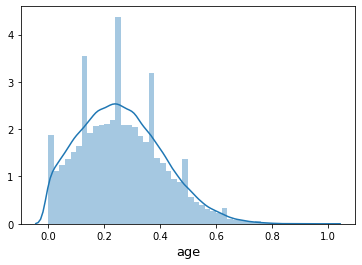

In [31]:
sns.distplot(new_data['age'], rug=False)
plt.xlabel('age', fontsize=13)

Text(0.5, 0, 'sex')

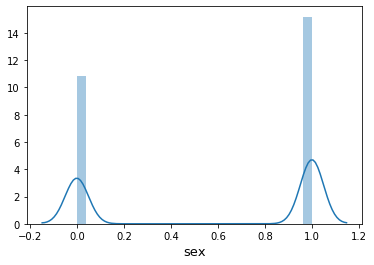

In [32]:
sns.distplot(new_data['sex'], rug=False)
plt.xlabel('sex', fontsize=13)

Text(0.5, 0, 'purchase_value')

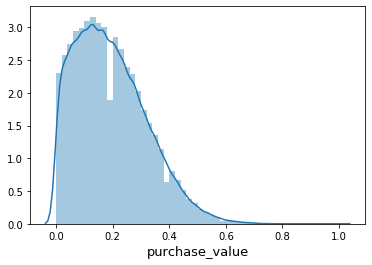

In [33]:
sns.distplot(new_data['purchase_value'], rug=False)
plt.xlabel('purchase_value', fontsize=13)

Text(0.5, 0, 'time')

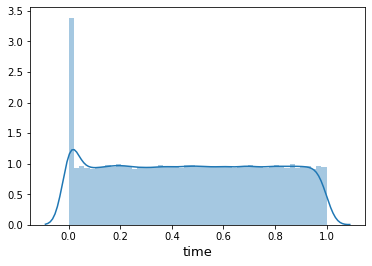

In [34]:
sns.distplot(new_data['time'], rug=False)
plt.xlabel('time', fontsize=13)

In [35]:
new_data['browser'].unique()

array(['Safari', 'Chrome', 'FireFox', 'IE', 'Opera'], dtype=object)

In [36]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [37]:
# t = LabelEncoder()
# new_data['browser'] = t.fit_transform(new_data['browser'])

In [38]:
one_hot_browser = pd.get_dummies(new_data['browser'])

In [39]:
one_hot_source = pd.get_dummies(new_data['source'])

In [40]:
new_data.drop('browser', axis =1, inplace = True)
new_data.drop('source', axis =1,  inplace = True)

In [41]:
country = new_data['country']
# country.to_csv('./country.csv')

In [42]:
new_data.drop('country', axis =1,  inplace = True)

In [43]:
one_hot_label = pd.concat((one_hot_browser,one_hot_source),axis = 1)
new_data_1 =  pd.concat((new_data,one_hot_label),axis =1 )
new_data_1

,age,sex,purchase_value,repeat,time,Chrome,FireFox,IE,Opera,Safari,Ads,Direct,SEO
0,0.258621,0,0.268966,0,0.700628,0,0,0,0,1,1,0,0
1,0.137931,1,0.282759,0,0.789170,1,0,0,0,0,0,1,0
2,0.172414,0,0.151724,0,0.628595,1,0,0,0,0,0,1,0
3,0.551724,0,0.151724,0,0.099136,0,1,0,0,0,1,0,0
4,0.155172,1,0.048276,0,0.107973,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27195,0.189655,1,0.268966,0,0.489623,0,0,1,0,0,0,0,1
27196,0.413793,0,0.020690,0,0.027825,0,0,0,0,1,1,0,0
27197,0.396552,1,0.117241,0,0.042595,1,0,0,0,0,1,0,0
27198,0.310345,1,0.055172,0,0.527262,0,0,1,0,0,1,0,0


In [44]:
# final_train = new_data_1[:108800]
# final_test  =  new_data_1[108800:]
final_train = new_data[:108800]
final_test  =  new_data[108800:]
print(final_train.shape,'\n', final_test.shape)

(108800, 5) 
 (27200, 5)


In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_train,
                                                    train_class,
                                                    test_size=0.25,
                                                    random_state=42,
                                                    shuffle=False)

In [46]:
!pip install xgboost
import xgboost as xgb
from sklearn import metrics

scale_pos = (108800 - 10132) / 10132
model_xgb = xgb.XGBClassifier(objective="binary:logistic",
                              random_state=42,
                              booster = 'gbtree',
                              gamma = 0 ,
                              #scale_pos_weight=scale_pos
                             )
model_xgb.fit(X_train, y_train)
pred = model_xgb.predict(X_test)
print('train evaluation :')
print('Accuracy:{:.2f}'.format(metrics.accuracy_score(y_test, pred)))


train evaluation :
Accuracy:0.96


In [47]:
print(pred)
print(y_test)

[0 0 0 ... 0 0 0]
81600     0
81601     0
81602     0
81603     0
81604     0
         ..
108795    0
108796    0
108797    0
108798    0
108799    0
Name: class, Length: 27200, dtype: int64


In [48]:
pred_xg = model_xgb.predict(final_test)

In [49]:
print(pred_xg)

[0 0 0 ... 0 0 0]


In [50]:
# prd = pd.DataFrame()
# prd['user_id'] = test_id
# prd['class'] = pred_2
# prd.to_csv('./final.csv', index = False)

In [51]:
#!pip install catboost
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=50,
    random_seed=63,
    learning_rate=0.5,
    #scale_pos_weight=scale_pos,
    custom_loss=["F1"]
)
model.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    verbose=False
)

In [52]:
pred_cat = model.predict(data=final_test)
print(pred_cat)

[0 0 0 ... 0 0 0]


In [53]:
submission = pd.DataFrame({'user_id':test_id, 'class': pred_cat})
submission.to_csv('./credit.csv', index = False)

In [54]:
result = (pred_xg + pred_cat)
print(result)

[0 0 0 ... 0 0 0]


In [55]:
result = (pred_xg + pred_cat ) / 2

In [56]:
result[result > 0] = 1

In [57]:
print(result.dtype)
result = result.astype(int)
print(result.dtype)

float64
int32


In [58]:
submission = pd.DataFrame({'user_id':test_id, 'class': result})
submission.to_csv('./ensemble.csv', index = False)